# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 10 epochs - using third approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups.',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '10 epochs', 'handcrafted_3'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_3,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 10,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 9944
Process ID: 18740
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 10 '
                               'epochs - using third approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups.',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '10 epochs',
                         'handcrafted_3']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fd8917c7

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


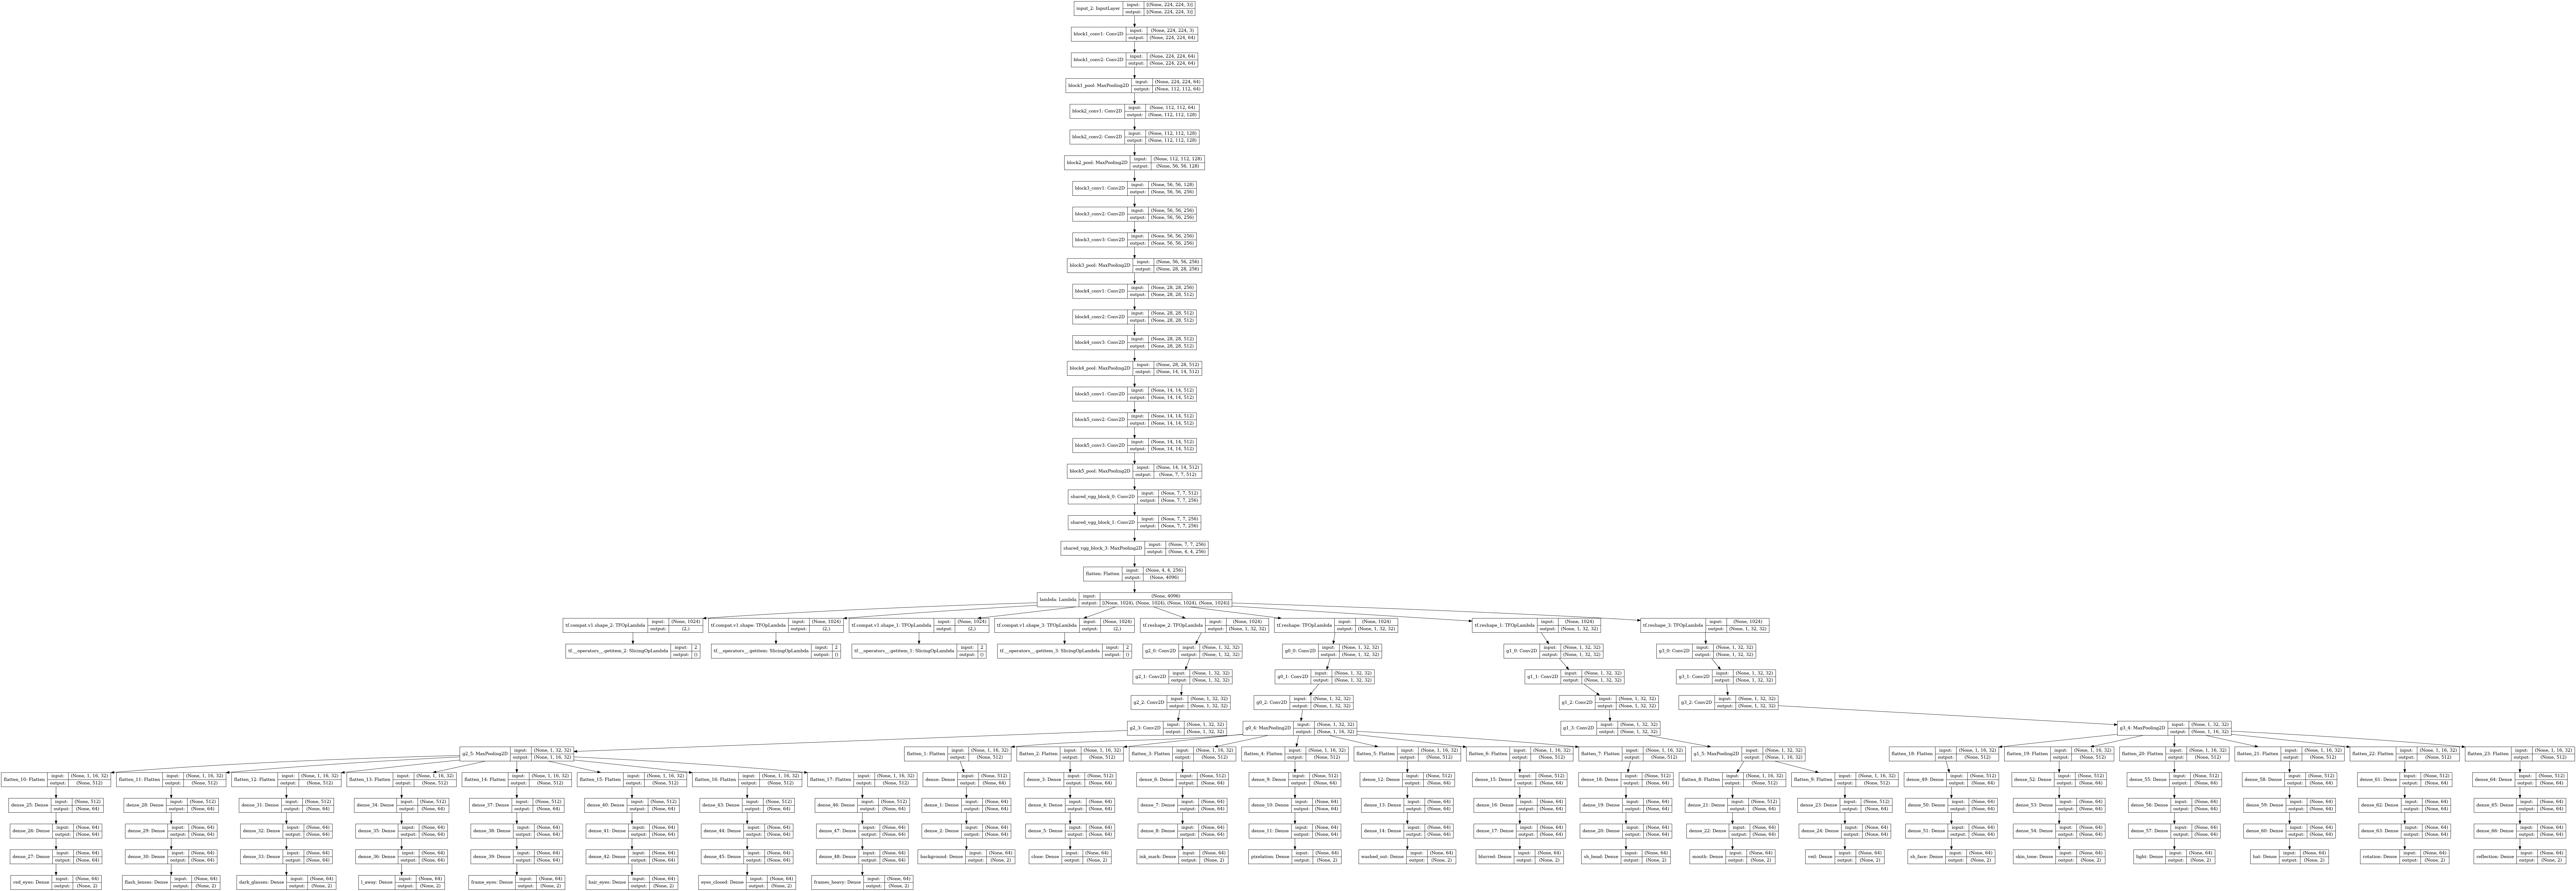

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,555,310
  .. Trainable params: 2,840,622
  .. Non-trainable params: 14,714,688
Epoch 1/10


154/154 [==============================] - 356s 2s/step - loss: 0.9975 - background_loss: 0.6166 - close_loss: 0.5459 - ink_mark_loss: 0.6159 - pixelation_loss: 0.5105 - washed_out_loss: 0.0984 - blurred_loss: 0.4324 - sh_head_loss: 0.3668 - mouth_loss: 0.0331 - veil_loss: 0.5804 - red_eyes_loss: 0.5189 - flash_lenses_loss: 0.2692 - dark_glasses_loss: 0.6951 - l_away_loss: 0.3223 - frame_eyes_loss: 0.6410 - hair_eyes_loss: 0.6330 - eyes_closed_loss: 0.3552 - frames_heavy_loss: 0.0154 - sh_face_loss: 0.6964 - skin_tone_loss: 0.0664 - light_loss: 0.2859 - hat_loss: 0.4875 - rotation_loss: 0.6665 - reflection_loss: 0.5220 - background_accuracy: 0.7285 - close_accuracy: 0.7541 - ink_mark_accuracy: 0.6849 - pixelation_accuracy: 0.7886 - washed_out_accuracy: 0.9825 - blurred_accuracy: 0.8438 - sh_head_accuracy: 0.8813 - mouth_accuracy: 0.9972 - veil_accuracy: 0.7072 - red_eyes_accuracy: 0.7902 - flash_lenses_accuracy: 0.9312 - dark_glasses_accuracy: 0.5136 - l_away_accuracy: 0.9182 - frame_e

# Plots

-------------------- draw training history -------------------


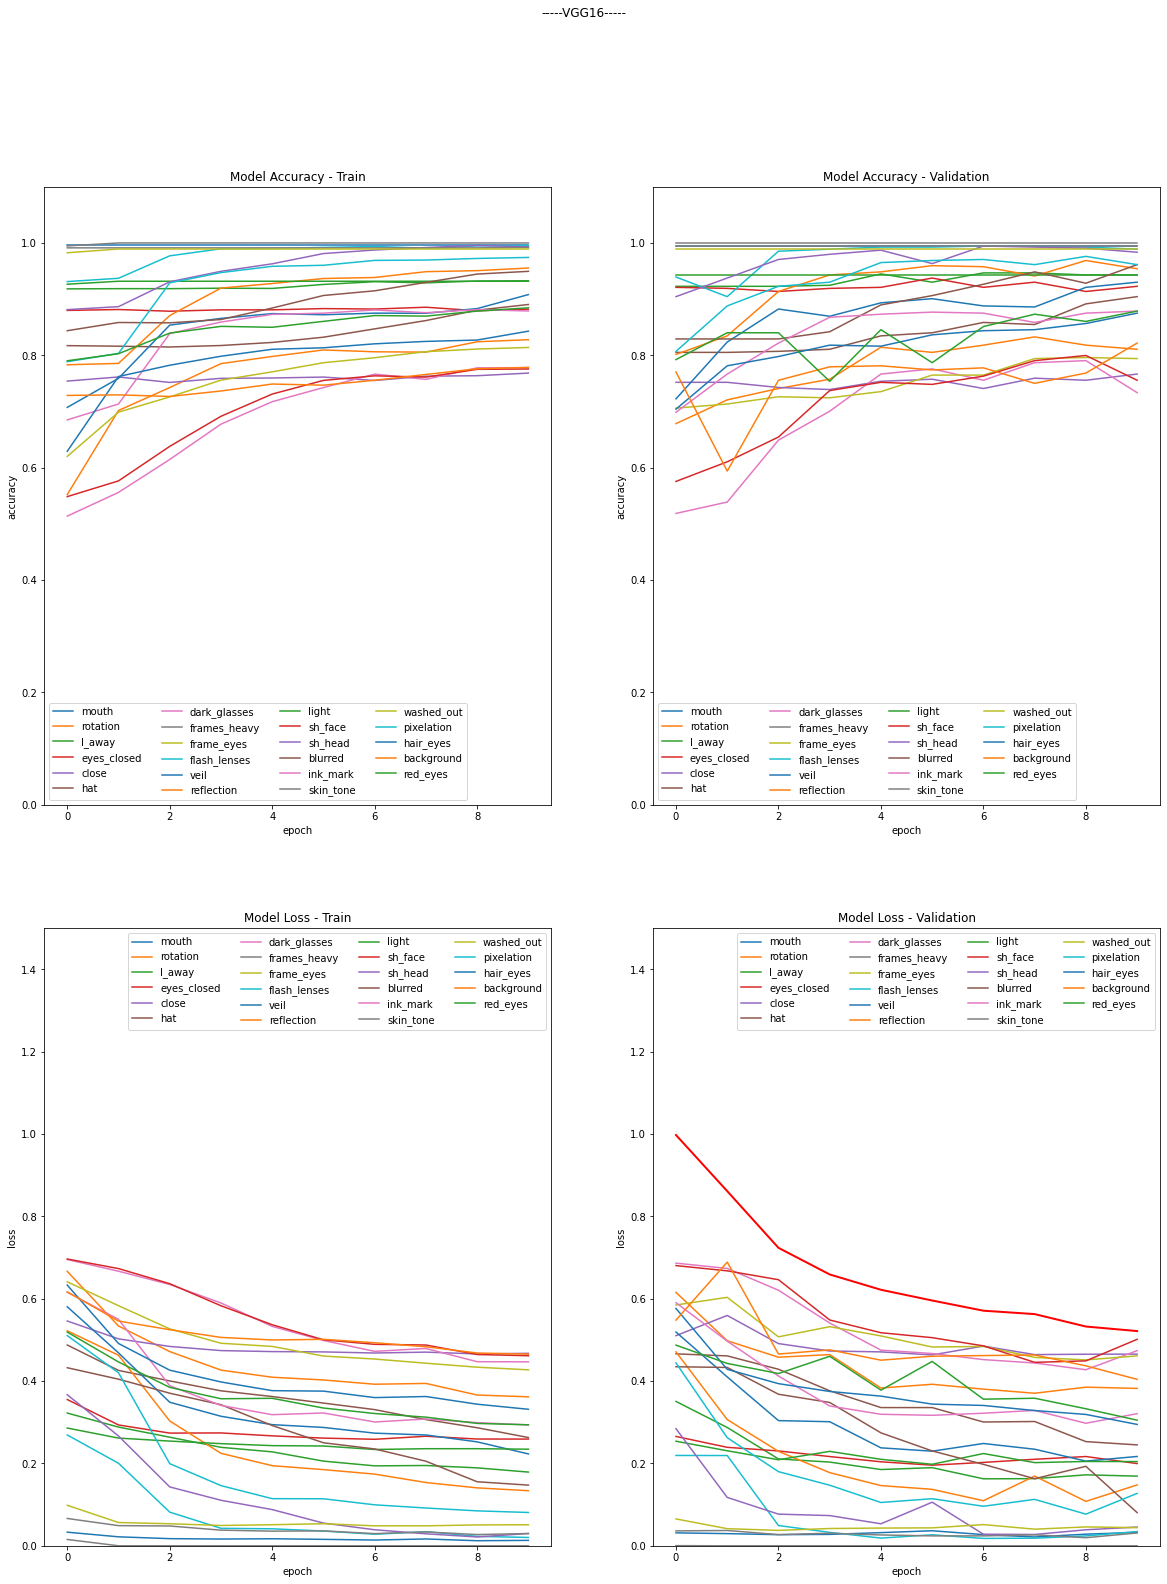

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!
Requisite: MOUTH


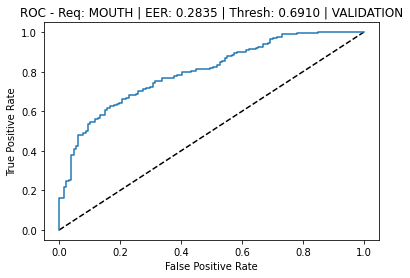

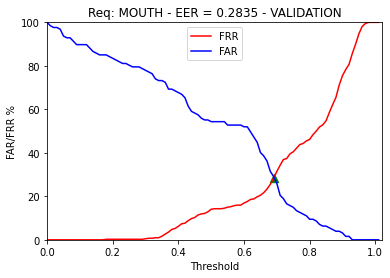

Requisite: MOUTH - EER_interp: 28.349999999999998% - Best Threshold: 0.6909705400466504
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.72      0.54       127
    COMPLIANT       0.89      0.72      0.80       420

     accuracy                           0.72       547
    macro avg       0.66      0.72      0.67       547
 weighted avg       0.79      0.72      0.74       547

Confusion matrix ----------------------------------------
FAR: 28.349999999999998% | FRR: 28.33% | EER_mean: 28.34% | TP: 301 | TN: 91 | FP: 36 | FN: 119
Accuracy ------------------------------------------------
Model Accuracy: 71.66%
---------------------------------------------------------
Requisite: ROTATION


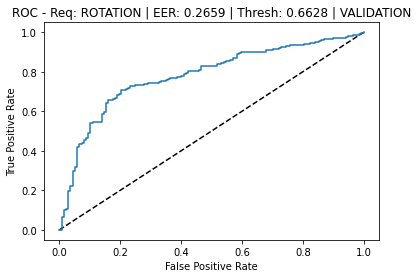

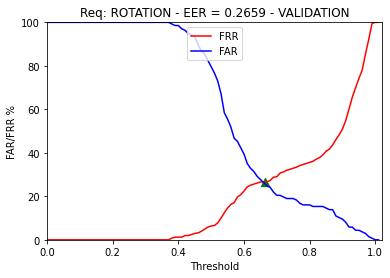

Requisite: ROTATION - EER_interp: 26.590000000000003% - Best Threshold: 0.6627892394981734
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.74      0.58       137
    COMPLIANT       0.89      0.73      0.81       410

     accuracy                           0.73       547
    macro avg       0.69      0.74      0.69       547
 weighted avg       0.79      0.73      0.75       547

Confusion matrix ----------------------------------------
FAR: 26.279999999999998% | FRR: 26.590000000000003% | EER_mean: 26.43% | TP: 301 | TN: 101 | FP: 36 | FN: 109
Accuracy ------------------------------------------------
Model Accuracy: 73.49%
---------------------------------------------------------
Requisite: L_AWAY


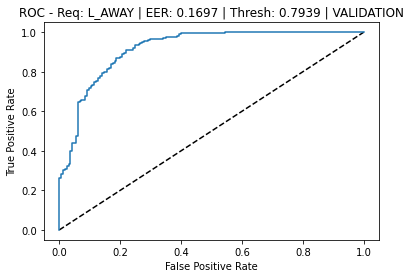

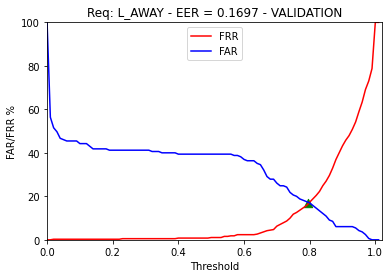

Requisite: L_AWAY - EER_interp: 16.97% - Best Threshold: 0.7938562631606921
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.69      0.83      0.75       165
    COMPLIANT       0.92      0.84      0.88       382

     accuracy                           0.84       547
    macro avg       0.80      0.83      0.81       547
 weighted avg       0.85      0.84      0.84       547

Confusion matrix ----------------------------------------
FAR: 16.97% | FRR: 16.23% | EER_mean: 16.6% | TP: 320 | TN: 137 | FP: 28 | FN: 62
Accuracy ------------------------------------------------
Model Accuracy: 83.55%
---------------------------------------------------------
Requisite: EYES_CLOSED


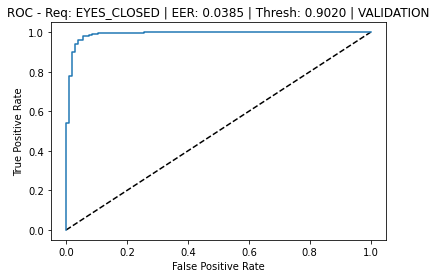

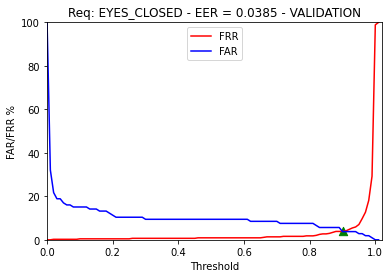

Requisite: EYES_CLOSED - EER_interp: 3.85% - Best Threshold: 0.9020060953639797
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.96      0.91       106
    COMPLIANT       0.99      0.96      0.98       441

     accuracy                           0.96       547
    macro avg       0.92      0.96      0.94       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.7699999999999996% | FRR: 3.85% | EER_mean: 3.81% | TP: 424 | TN: 102 | FP: 4 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 96.16%
---------------------------------------------------------
Requisite: CLOSE


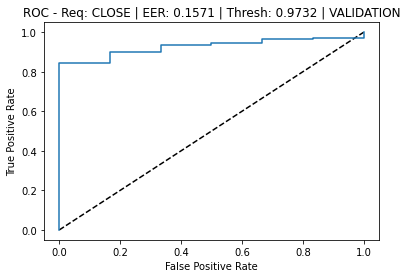

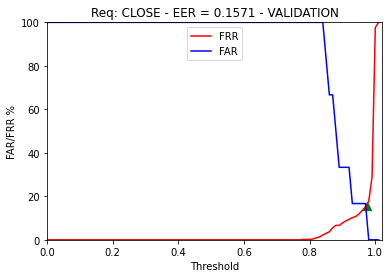

Requisite: CLOSE - EER_interp: 15.709999999999999% - Best Threshold: 0.973243593618742
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.12         6
    COMPLIANT       1.00      0.84      0.91       541

     accuracy                           0.84       547
    macro avg       0.53      0.92      0.52       547
 weighted avg       0.99      0.84      0.91       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 15.709999999999999% | EER_mean: 7.86% | TP: 456 | TN: 6 | FP: 0 | FN: 85
Accuracy ------------------------------------------------
Model Accuracy: 84.46000000000001%
---------------------------------------------------------
Requisite: HAT


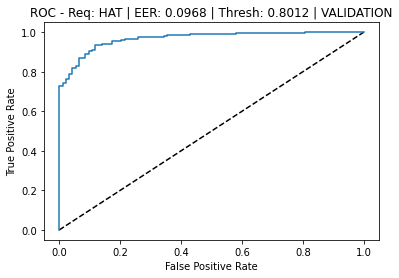

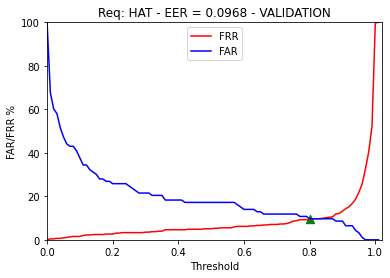

Requisite: HAT - EER_interp: 9.68% - Best Threshold: 0.8012297749519245
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.66      0.90      0.76        93
    COMPLIANT       0.98      0.91      0.94       454

     accuracy                           0.90       547
    macro avg       0.82      0.90      0.85       547
 weighted avg       0.92      0.90      0.91       547

Confusion matrix ----------------------------------------
FAR: 9.68% | FRR: 9.47% | EER_mean: 9.58% | TP: 411 | TN: 84 | FP: 9 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 90.49000000000001%
---------------------------------------------------------
Requisite: DARK_GLASSES


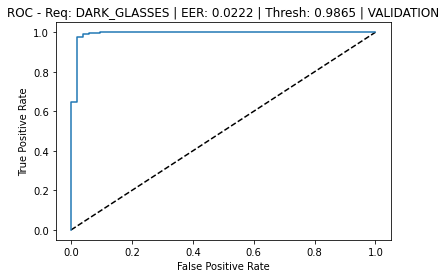

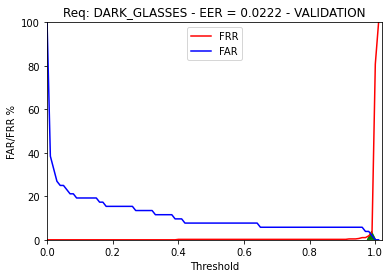

Requisite: DARK_GLASSES - EER_interp: 2.22% - Best Threshold: 0.9864653189977062
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.98      0.89        52
    COMPLIANT       1.00      0.98      0.99       495

     accuracy                           0.98       547
    macro avg       0.91      0.98      0.94       547
 weighted avg       0.98      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 1.92% | FRR: 2.22% | EER_mean: 2.07% | TP: 484 | TN: 51 | FP: 1 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 97.81%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


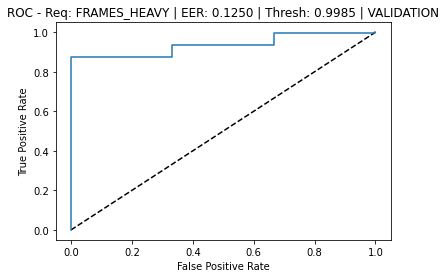

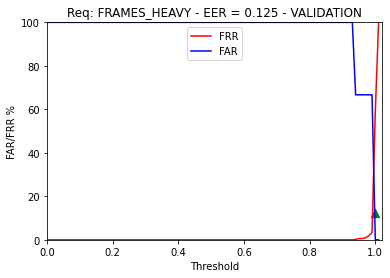

Requisite: FRAMES_HEAVY - EER_interp: 12.5% - Best Threshold: 0.9985364228487015
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      1.00      0.08         3
    COMPLIANT       1.00      0.88      0.93       544

     accuracy                           0.88       547
    macro avg       0.52      0.94      0.51       547
 weighted avg       0.99      0.88      0.93       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 12.5% | EER_mean: 6.25% | TP: 476 | TN: 3 | FP: 0 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 87.57000000000001%
---------------------------------------------------------
Requisite: FRAME_EYES


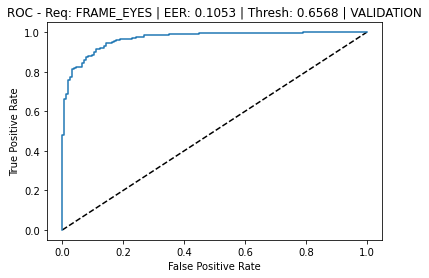

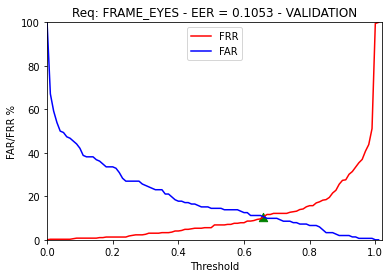

Requisite: FRAME_EYES - EER_interp: 10.530000000000001% - Best Threshold: 0.6567864418026974
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.89      0.83       152
    COMPLIANT       0.96      0.90      0.93       395

     accuracy                           0.90       547
    macro avg       0.87      0.90      0.88       547
 weighted avg       0.91      0.90      0.90       547

Confusion matrix ----------------------------------------
FAR: 10.530000000000001% | FRR: 9.87% | EER_mean: 10.2% | TP: 356 | TN: 136 | FP: 16 | FN: 39
Accuracy ------------------------------------------------
Model Accuracy: 89.95%
---------------------------------------------------------
Requisite: FLASH_LENSES


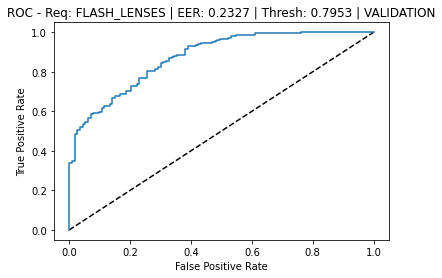

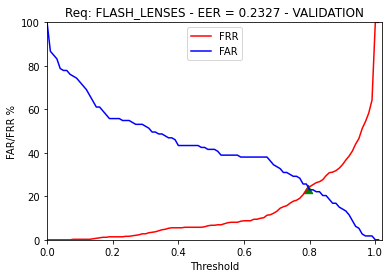

Requisite: FLASH_LENSES - EER_interp: 23.27% - Best Threshold: 0.7952786212967288
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.77      0.58       113
    COMPLIANT       0.93      0.77      0.84       434

     accuracy                           0.77       547
    macro avg       0.70      0.77      0.71       547
 weighted avg       0.83      0.77      0.79       547

Confusion matrix ----------------------------------------
FAR: 23.01% | FRR: 23.27% | EER_mean: 23.14% | TP: 333 | TN: 87 | FP: 26 | FN: 101
Accuracy ------------------------------------------------
Model Accuracy: 76.78%
---------------------------------------------------------
Requisite: VEIL


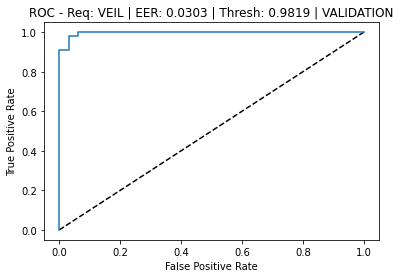

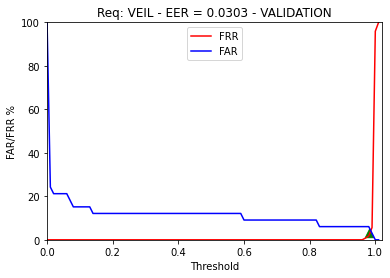

Requisite: VEIL - EER_interp: 3.0300000000000002% - Best Threshold: 0.9819372296333198
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.97      0.86        33
    COMPLIANT       1.00      0.98      0.99       514

     accuracy                           0.98       547
    macro avg       0.89      0.98      0.93       547
 weighted avg       0.98      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 3.0300000000000002% | FRR: 1.7500000000000002% | EER_mean: 2.39% | TP: 505 | TN: 32 | FP: 1 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 98.17%
---------------------------------------------------------
Requisite: REFLECTION


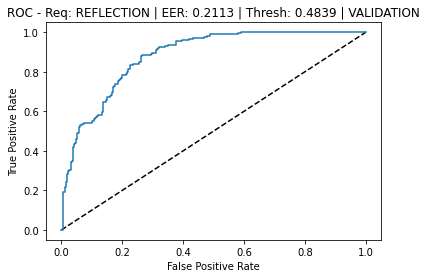

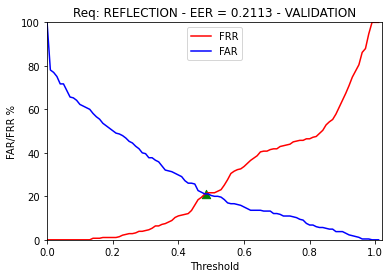

Requisite: REFLECTION - EER_interp: 21.13% - Best Threshold: 0.48388561606349967
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.79      0.78       265
    COMPLIANT       0.80      0.79      0.80       282

     accuracy                           0.79       547
    macro avg       0.79      0.79      0.79       547
 weighted avg       0.79      0.79      0.79       547

Confusion matrix ----------------------------------------
FAR: 21.13% | FRR: 20.919999999999998% | EER_mean: 21.02% | TP: 223 | TN: 209 | FP: 56 | FN: 59
Accuracy ------------------------------------------------
Model Accuracy: 78.97999999999999%
---------------------------------------------------------
Requisite: LIGHT


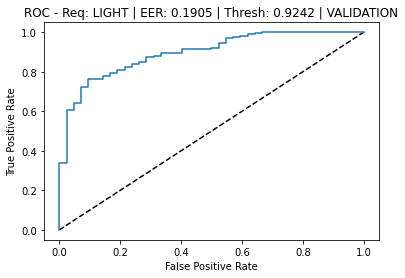

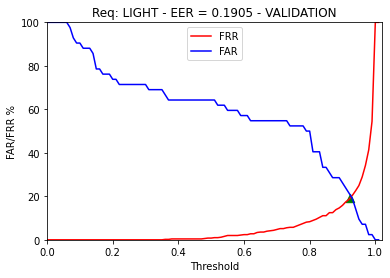

Requisite: LIGHT - EER_interp: 19.05% - Best Threshold: 0.9241603612899593
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.81      0.40        42
    COMPLIANT       0.98      0.81      0.89       505

     accuracy                           0.81       547
    macro avg       0.62      0.81      0.64       547
 weighted avg       0.93      0.81      0.85       547

Confusion matrix ----------------------------------------
FAR: 19.05% | FRR: 19.009999999999998% | EER_mean: 19.03% | TP: 409 | TN: 34 | FP: 8 | FN: 96
Accuracy ------------------------------------------------
Model Accuracy: 80.99%
---------------------------------------------------------
Requisite: SH_FACE


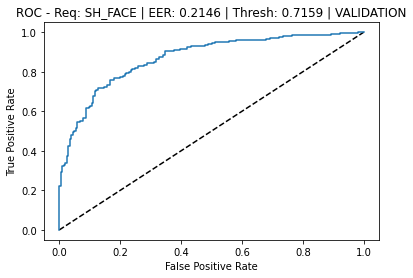

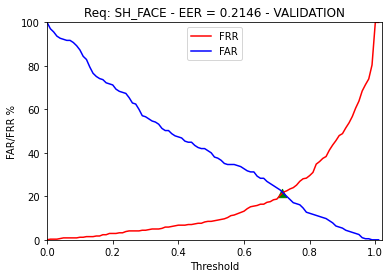

Requisite: SH_FACE - EER_interp: 21.46% - Best Threshold: 0.7159364819526218
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.69      0.79      0.74       205
    COMPLIANT       0.86      0.79      0.82       342

     accuracy                           0.79       547
    macro avg       0.78      0.79      0.78       547
 weighted avg       0.80      0.79      0.79       547

Confusion matrix ----------------------------------------
FAR: 21.46% | FRR: 21.05% | EER_mean: 21.26% | TP: 270 | TN: 161 | FP: 44 | FN: 72
Accuracy ------------------------------------------------
Model Accuracy: 78.79%
---------------------------------------------------------
Requisite: SH_HEAD


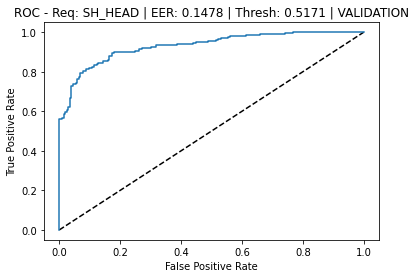

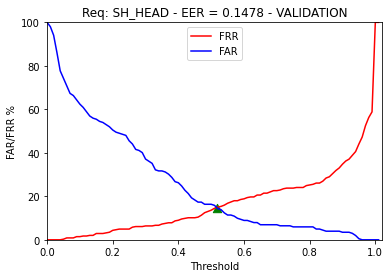

Requisite: SH_HEAD - EER_interp: 14.78% - Best Threshold: 0.517114064226984
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.86      0.81       202
    COMPLIANT       0.91      0.85      0.88       345

     accuracy                           0.85       547
    macro avg       0.84      0.85      0.85       547
 weighted avg       0.86      0.85      0.86       547

Confusion matrix ----------------------------------------
FAR: 14.360000000000001% | FRR: 14.78% | EER_mean: 14.57% | TP: 294 | TN: 173 | FP: 29 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 85.37%
---------------------------------------------------------
Requisite: BLURRED


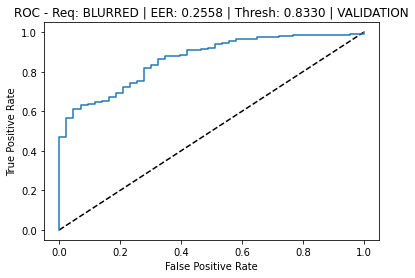

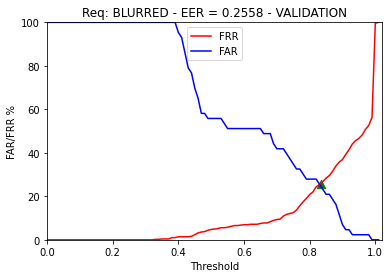

Requisite: BLURRED - EER_interp: 25.580000000000002% - Best Threshold: 0.8330497145652794
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      0.74      0.31        43
    COMPLIANT       0.97      0.74      0.84       504

     accuracy                           0.74       547
    macro avg       0.59      0.74      0.58       547
 weighted avg       0.91      0.74      0.80       547

Confusion matrix ----------------------------------------
FAR: 25.580000000000002% | FRR: 25.6% | EER_mean: 25.590000000000003% | TP: 375 | TN: 32 | FP: 11 | FN: 129
Accuracy ------------------------------------------------
Model Accuracy: 74.41%
---------------------------------------------------------
Requisite: SKIN_TONE


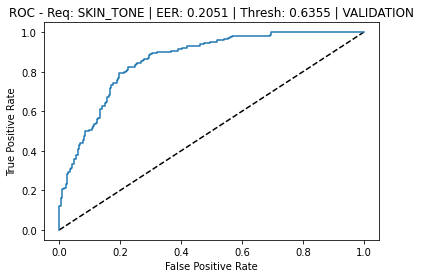

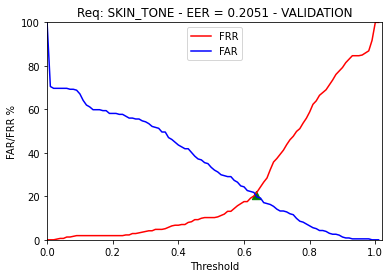

Requisite: SKIN_TONE - EER_interp: 20.51% - Best Threshold: 0.6355082392687005
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.74      0.79      0.77       234
    COMPLIANT       0.84      0.80      0.82       313

     accuracy                           0.80       547
    macro avg       0.79      0.80      0.79       547
 weighted avg       0.80      0.80      0.80       547

Confusion matrix ----------------------------------------
FAR: 20.51% | FRR: 20.45% | EER_mean: 20.48% | TP: 249 | TN: 186 | FP: 48 | FN: 64
Accuracy ------------------------------------------------
Model Accuracy: 79.52%
---------------------------------------------------------
Requisite: WASHED_OUT


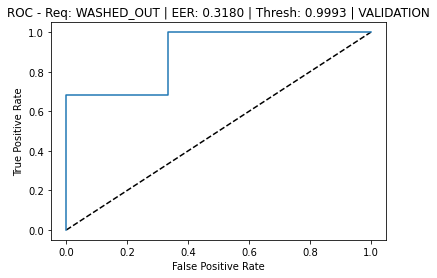

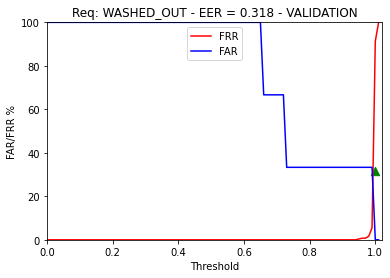

Requisite: WASHED_OUT - EER_interp: 31.8% - Best Threshold: 0.9993441740379614
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      1.00      0.03         3
    COMPLIANT       1.00      0.68      0.81       544

     accuracy                           0.68       547
    macro avg       0.51      0.84      0.42       547
 weighted avg       0.99      0.68      0.81       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 31.8% | EER_mean: 15.9% | TP: 371 | TN: 3 | FP: 0 | FN: 173
Accuracy ------------------------------------------------
Model Accuracy: 68.37%
---------------------------------------------------------
Requisite: PIXELATION


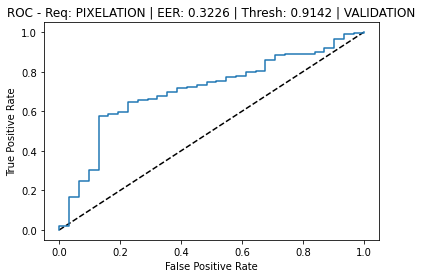

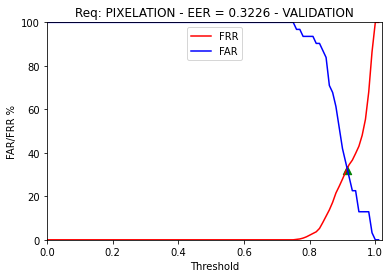

Requisite: PIXELATION - EER_interp: 32.26% - Best Threshold: 0.9141587615012887
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      0.68      0.19        31
    COMPLIANT       0.97      0.68      0.80       516

     accuracy                           0.68       547
    macro avg       0.54      0.68      0.50       547
 weighted avg       0.92      0.68      0.76       547

Confusion matrix ----------------------------------------
FAR: 32.26% | FRR: 32.17% | EER_mean: 32.22% | TP: 350 | TN: 21 | FP: 10 | FN: 166
Accuracy ------------------------------------------------
Model Accuracy: 67.82000000000001%
---------------------------------------------------------
Requisite: HAIR_EYES


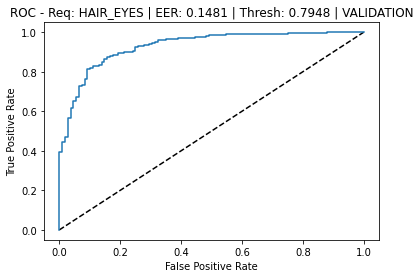

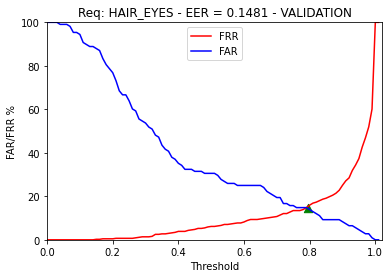

Requisite: HAIR_EYES - EER_interp: 14.81% - Best Threshold: 0.7947609424591644
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.85      0.69       108
    COMPLIANT       0.96      0.85      0.90       439

     accuracy                           0.85       547
    macro avg       0.77      0.85      0.80       547
 weighted avg       0.88      0.85      0.86       547

Confusion matrix ----------------------------------------
FAR: 14.81% | FRR: 15.03% | EER_mean: 14.92% | TP: 373 | TN: 92 | FP: 16 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 85.00999999999999%
---------------------------------------------------------
Requisite: BACKGROUND


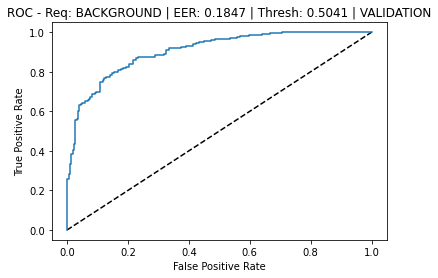

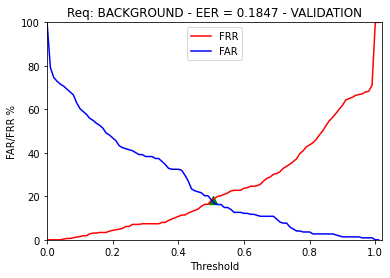

Requisite: BACKGROUND - EER_interp: 18.47% - Best Threshold: 0.5040626525879274
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.75      0.82      0.78       222
    COMPLIANT       0.87      0.81      0.84       325

     accuracy                           0.81       547
    macro avg       0.81      0.81      0.81       547
 weighted avg       0.82      0.81      0.81       547

Confusion matrix ----------------------------------------
FAR: 18.47% | FRR: 18.77% | EER_mean: 18.62% | TP: 264 | TN: 181 | FP: 41 | FN: 61
Accuracy ------------------------------------------------
Model Accuracy: 81.35%
---------------------------------------------------------
Requisite: RED_EYES


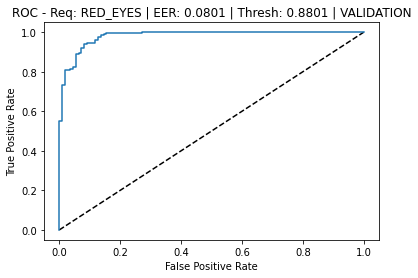

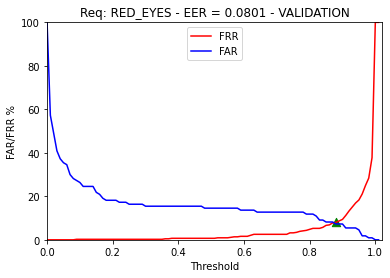

Requisite: RED_EYES - EER_interp: 8.01% - Best Threshold: 0.8800923070045577
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.74      0.93      0.83       110
    COMPLIANT       0.98      0.92      0.95       437

     accuracy                           0.92       547
    macro avg       0.86      0.92      0.89       547
 weighted avg       0.93      0.92      0.92       547

Confusion matrix ----------------------------------------
FAR: 7.2700000000000005% | FRR: 8.01% | EER_mean: 7.64% | TP: 402 | TN: 102 | FP: 8 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 92.14%
---------------------------------------------------------


In [16]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 24s 3s/step
Prediction finished!
Requisite: MOUTH


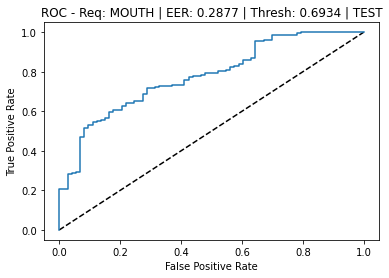

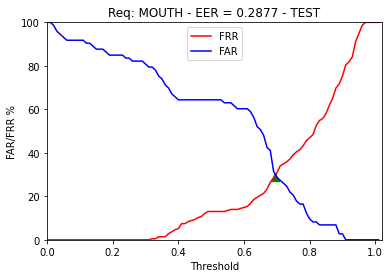

Requisite: MOUTH - EER_interp: 28.77% - Best Threshold: 0.6934287548065101
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.71      0.56        73
    COMPLIANT       0.88      0.72      0.79       215

     accuracy                           0.72       288
    macro avg       0.67      0.71      0.67       288
 weighted avg       0.77      0.72      0.73       288

Confusion matrix ----------------------------------------
FAR: 28.77% | FRR: 28.37% | EER_mean: 28.57% | TP: 154 | TN: 52 | FP: 21 | FN: 61
Accuracy ------------------------------------------------
Model Accuracy: 71.53%
---------------------------------------------------------
Requisite: ROTATION


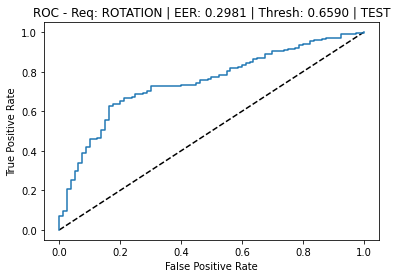

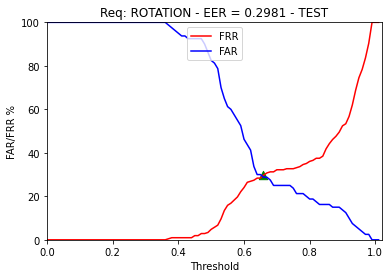

Requisite: ROTATION - EER_interp: 29.81% - Best Threshold: 0.6590438668544476
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.71      0.57        80
    COMPLIANT       0.86      0.70      0.77       208

     accuracy                           0.70       288
    macro avg       0.67      0.71      0.67       288
 weighted avg       0.76      0.70      0.72       288

Confusion matrix ----------------------------------------
FAR: 28.749999999999996% | FRR: 29.81% | EER_mean: 29.28% | TP: 146 | TN: 57 | FP: 23 | FN: 62
Accuracy ------------------------------------------------
Model Accuracy: 70.49%
---------------------------------------------------------
Requisite: L_AWAY


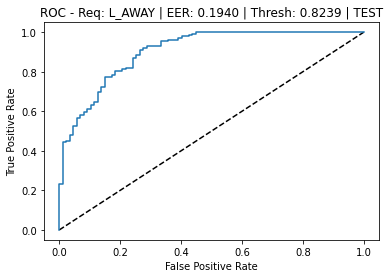

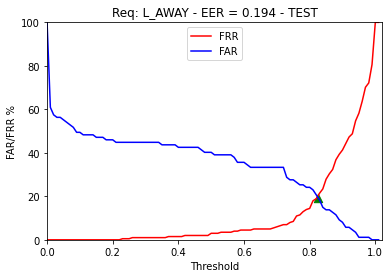

Requisite: L_AWAY - EER_interp: 19.400000000000002% - Best Threshold: 0.8239000501917363
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.64      0.80      0.71        87
    COMPLIANT       0.91      0.81      0.85       201

     accuracy                           0.81       288
    macro avg       0.77      0.81      0.78       288
 weighted avg       0.83      0.81      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.54% | FRR: 19.400000000000002% | EER_mean: 19.470000000000002% | TP: 162 | TN: 70 | FP: 17 | FN: 39
Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------
Requisite: EYES_CLOSED


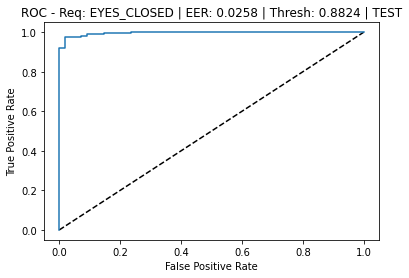

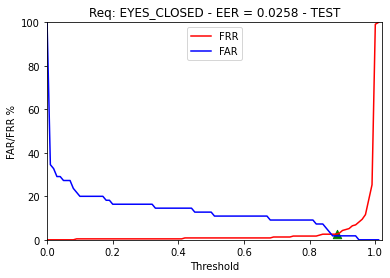

Requisite: EYES_CLOSED - EER_interp: 2.58% - Best Threshold: 0.882379095015437
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.98      0.94        55
    COMPLIANT       1.00      0.97      0.98       233

     accuracy                           0.98       288
    macro avg       0.95      0.98      0.96       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.58% | EER_mean: 2.1999999999999997% | TP: 227 | TN: 54 | FP: 1 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 97.57000000000001%
---------------------------------------------------------
Requisite: CLOSE


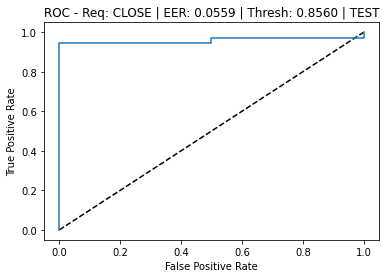

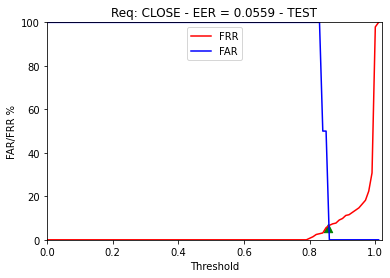

Requisite: CLOSE - EER_interp: 5.59% - Best Threshold: 0.8559789916018506
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      1.00      0.20         2
    COMPLIANT       1.00      0.94      0.97       286

     accuracy                           0.94       288
    macro avg       0.56      0.97      0.59       288
 weighted avg       0.99      0.94      0.97       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 5.59% | EER_mean: 2.8000000000000003% | TP: 270 | TN: 2 | FP: 0 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 94.44%
---------------------------------------------------------
Requisite: HAT


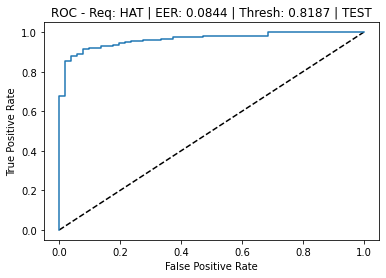

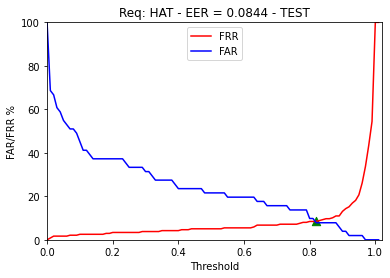

Requisite: HAT - EER_interp: 8.44% - Best Threshold: 0.8186937132968162
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.70      0.92      0.80        51
    COMPLIANT       0.98      0.92      0.95       237

     accuracy                           0.92       288
    macro avg       0.84      0.92      0.87       288
 weighted avg       0.93      0.92      0.92       288

Confusion matrix ----------------------------------------
FAR: 7.84% | FRR: 8.44% | EER_mean: 8.14% | TP: 217 | TN: 47 | FP: 4 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 91.67%
---------------------------------------------------------
Requisite: DARK_GLASSES


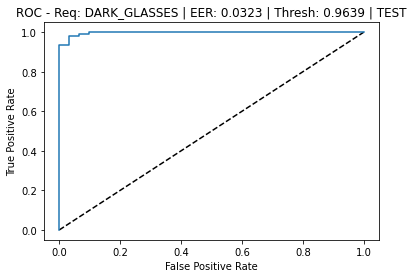

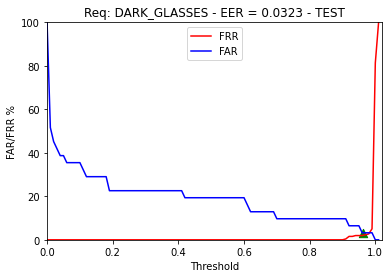

Requisite: DARK_GLASSES - EER_interp: 3.2300000000000004% - Best Threshold: 0.963900387287027
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.97      0.91        31
    COMPLIANT       1.00      0.98      0.99       257

     accuracy                           0.98       288
    macro avg       0.93      0.97      0.95       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 3.2300000000000004% | FRR: 1.95% | EER_mean: 2.59% | TP: 252 | TN: 30 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


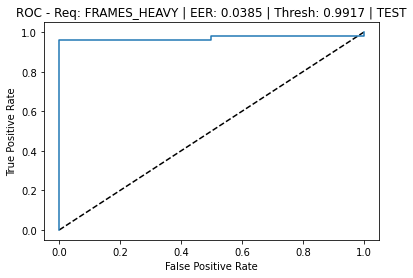

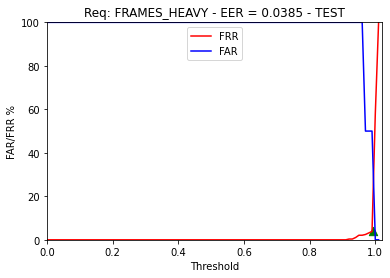

Requisite: FRAMES_HEAVY - EER_interp: 3.85% - Best Threshold: 0.9916775501691378
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.15      1.00      0.27         2
    COMPLIANT       1.00      0.96      0.98       286

     accuracy                           0.96       288
    macro avg       0.58      0.98      0.62       288
 weighted avg       0.99      0.96      0.98       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 3.85% | EER_mean: 1.92% | TP: 275 | TN: 2 | FP: 0 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
Requisite: FRAME_EYES


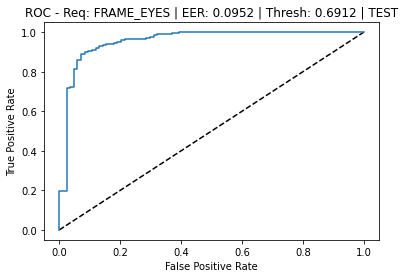

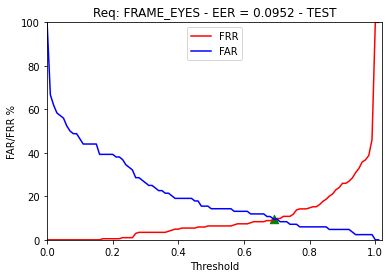

Requisite: FRAME_EYES - EER_interp: 9.520000000000001% - Best Threshold: 0.691210806369599
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.90      0.85        84
    COMPLIANT       0.96      0.91      0.93       204

     accuracy                           0.91       288
    macro avg       0.88      0.91      0.89       288
 weighted avg       0.91      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 9.520000000000001% | FRR: 9.31% | EER_mean: 9.42% | TP: 185 | TN: 76 | FP: 8 | FN: 19
Accuracy ------------------------------------------------
Model Accuracy: 90.62%
---------------------------------------------------------
Requisite: FLASH_LENSES


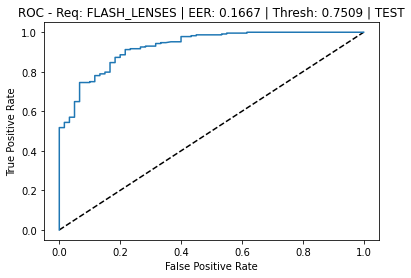

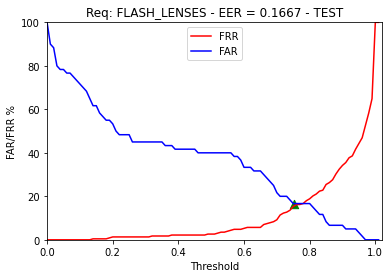

Requisite: FLASH_LENSES - EER_interp: 16.669999999999998% - Best Threshold: 0.7508553266524999
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.59      0.83      0.69        60
    COMPLIANT       0.95      0.85      0.90       228

     accuracy                           0.84       288
    macro avg       0.77      0.84      0.79       288
 weighted avg       0.88      0.84      0.85       288

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 15.35% | EER_mean: 16.009999999999998% | TP: 193 | TN: 50 | FP: 10 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 84.38%
---------------------------------------------------------
Requisite: VEIL


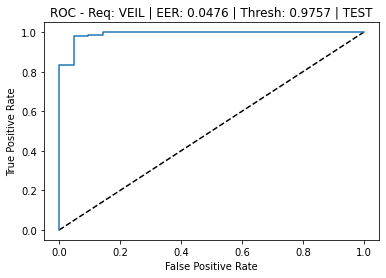

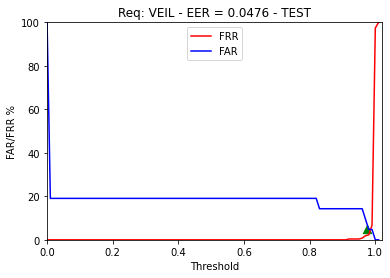

Requisite: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.9756941199301726
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.95      0.87        21
    COMPLIANT       1.00      0.98      0.99       267

     accuracy                           0.98       288
    macro avg       0.90      0.97      0.93       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 1.87% | EER_mean: 3.32% | TP: 262 | TN: 20 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Requisite: REFLECTION


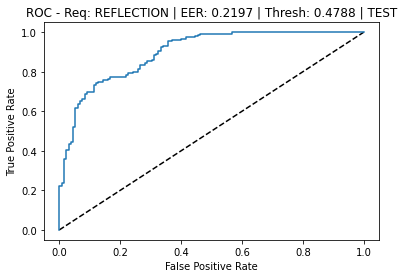

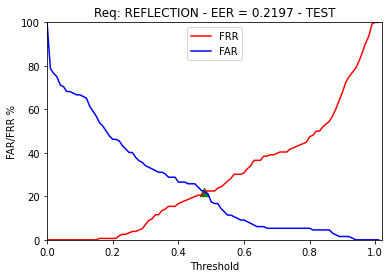

Requisite: REFLECTION - EER_interp: 21.97% - Best Threshold: 0.4788151085373835
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.75      0.78      0.77       132
    COMPLIANT       0.81      0.78      0.79       156

     accuracy                           0.78       288
    macro avg       0.78      0.78      0.78       288
 weighted avg       0.78      0.78      0.78       288

Confusion matrix ----------------------------------------
FAR: 21.97% | FRR: 21.790000000000003% | EER_mean: 21.88% | TP: 122 | TN: 103 | FP: 29 | FN: 34
Accuracy ------------------------------------------------
Model Accuracy: 78.12%
---------------------------------------------------------
Requisite: LIGHT


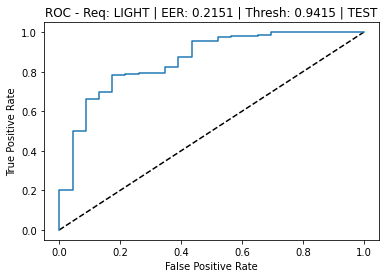

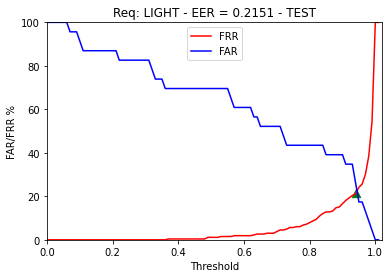

Requisite: LIGHT - EER_interp: 21.51% - Best Threshold: 0.9415475258287396
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.83      0.38        23
    COMPLIANT       0.98      0.78      0.87       265

     accuracy                           0.79       288
    macro avg       0.62      0.81      0.63       288
 weighted avg       0.92      0.79      0.83       288

Confusion matrix ----------------------------------------
FAR: 17.39% | FRR: 21.51% | EER_mean: 19.45% | TP: 208 | TN: 19 | FP: 4 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 78.82000000000001%
---------------------------------------------------------
Requisite: SH_FACE


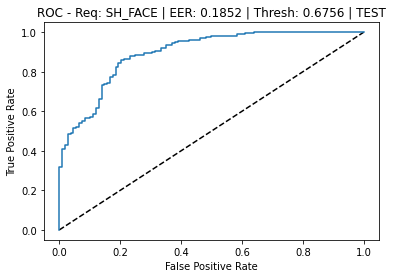

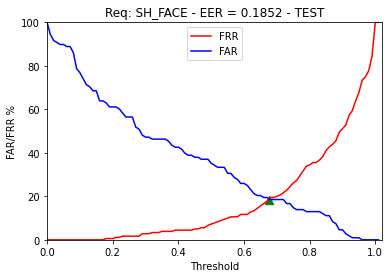

Requisite: SH_FACE - EER_interp: 18.52% - Best Threshold: 0.6755523085590212
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.81      0.77       108
    COMPLIANT       0.88      0.82      0.85       180

     accuracy                           0.82       288
    macro avg       0.81      0.82      0.81       288
 weighted avg       0.83      0.82      0.82       288

Confusion matrix ----------------------------------------
FAR: 18.52% | FRR: 17.78% | EER_mean: 18.15% | TP: 148 | TN: 88 | FP: 20 | FN: 32
Accuracy ------------------------------------------------
Model Accuracy: 81.94%
---------------------------------------------------------
Requisite: SH_HEAD


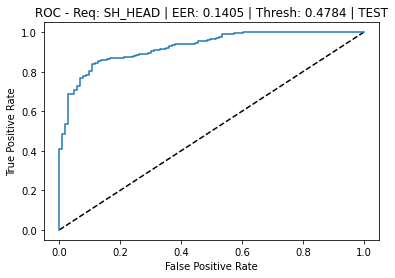

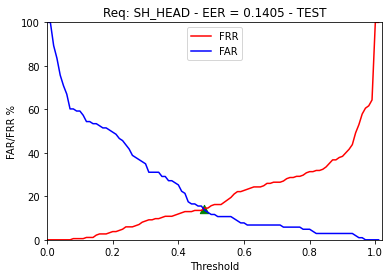

Requisite: SH_HEAD - EER_interp: 14.05% - Best Threshold: 0.4783551051810041
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.86      0.82       103
    COMPLIANT       0.92      0.86      0.89       185

     accuracy                           0.86       288
    macro avg       0.85      0.86      0.85       288
 weighted avg       0.87      0.86      0.86       288

Confusion matrix ----------------------------------------
FAR: 13.59% | FRR: 14.05% | EER_mean: 13.819999999999999% | TP: 159 | TN: 89 | FP: 14 | FN: 26
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Requisite: BLURRED


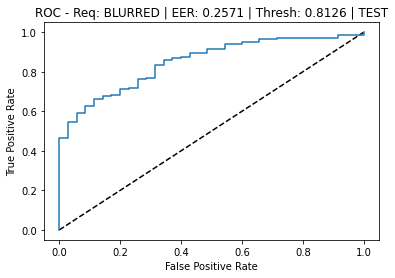

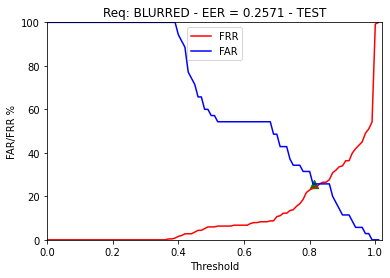

Requisite: BLURRED - EER_interp: 25.71% - Best Threshold: 0.812645733356273
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.74      0.43        35
    COMPLIANT       0.96      0.76      0.85       253

     accuracy                           0.76       288
    macro avg       0.63      0.75      0.64       288
 weighted avg       0.88      0.76      0.80       288

Confusion matrix ----------------------------------------
FAR: 25.71% | FRR: 23.72% | EER_mean: 24.72% | TP: 193 | TN: 26 | FP: 9 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 76.03999999999999%
---------------------------------------------------------
Requisite: SKIN_TONE


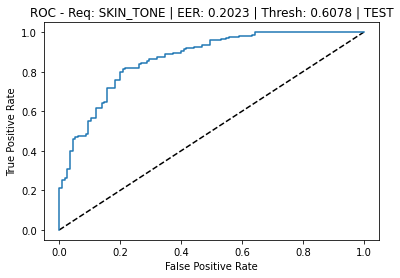

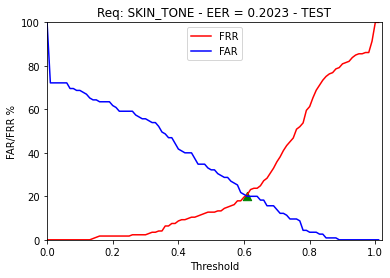

Requisite: SKIN_TONE - EER_interp: 20.23% - Best Threshold: 0.6077909745232958
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.72      0.80      0.76       115
    COMPLIANT       0.86      0.80      0.83       173

     accuracy                           0.80       288
    macro avg       0.79      0.80      0.79       288
 weighted avg       0.80      0.80      0.80       288

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 20.23% | EER_mean: 20.119999999999997% | TP: 138 | TN: 92 | FP: 23 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 79.86%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


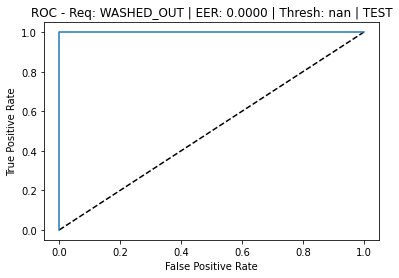

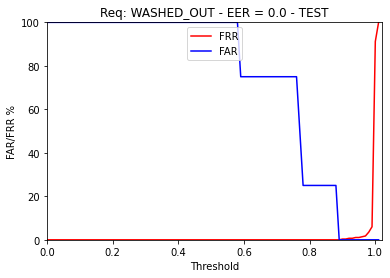

Requisite: WASHED_OUT - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         4
    COMPLIANT       0.99      1.00      0.99       284

     accuracy                           0.99       288
    macro avg       0.49      0.50      0.50       288
 weighted avg       0.97      0.99      0.98       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 284 | TN: 0 | FP: 4 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


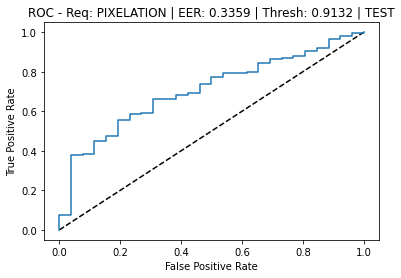

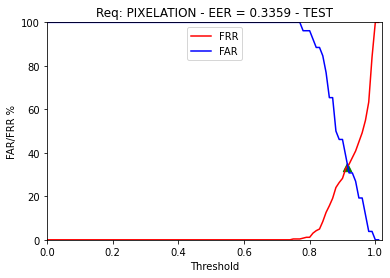

Requisite: PIXELATION - EER_interp: 33.589999999999996% - Best Threshold: 0.9131618770024249
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.16      0.65      0.26        26
    COMPLIANT       0.95      0.66      0.78       262

     accuracy                           0.66       288
    macro avg       0.56      0.66      0.52       288
 weighted avg       0.88      0.66      0.73       288

Confusion matrix ----------------------------------------
FAR: 34.62% | FRR: 33.589999999999996% | EER_mean: 34.1% | TP: 174 | TN: 17 | FP: 9 | FN: 88
Accuracy ------------------------------------------------
Model Accuracy: 66.32000000000001%
---------------------------------------------------------
Requisite: HAIR_EYES


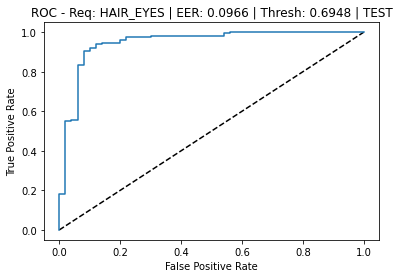

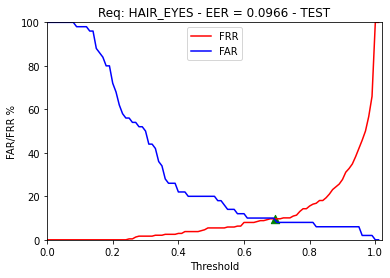

Requisite: HAIR_EYES - EER_interp: 9.66% - Best Threshold: 0.6948017337738079
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.67      0.92      0.77        50
    COMPLIANT       0.98      0.90      0.94       238

     accuracy                           0.91       288
    macro avg       0.82      0.91      0.86       288
 weighted avg       0.93      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 8.0% | FRR: 9.66% | EER_mean: 8.83% | TP: 215 | TN: 46 | FP: 4 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 90.62%
---------------------------------------------------------
Requisite: BACKGROUND


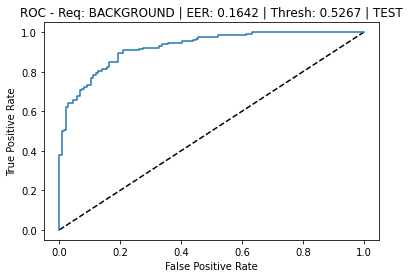

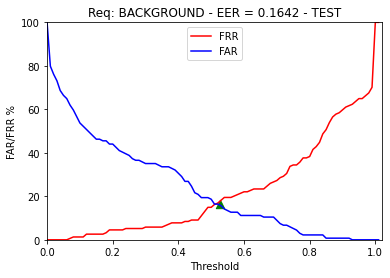

Requisite: BACKGROUND - EER_interp: 16.42% - Best Threshold: 0.5266833901406494
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.81      0.84      0.82       134
    COMPLIANT       0.85      0.82      0.84       154

     accuracy                           0.83       288
    macro avg       0.83      0.83      0.83       288
 weighted avg       0.83      0.83      0.83       288

Confusion matrix ----------------------------------------
FAR: 16.42% | FRR: 17.53% | EER_mean: 16.98% | TP: 127 | TN: 112 | FP: 22 | FN: 27
Accuracy ------------------------------------------------
Model Accuracy: 82.99%
---------------------------------------------------------
Requisite: RED_EYES


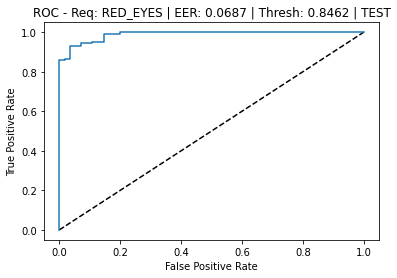

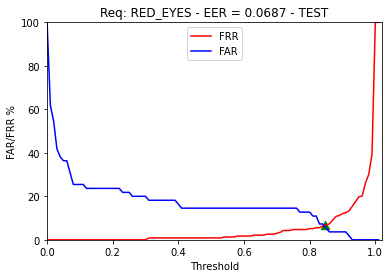

Requisite: RED_EYES - EER_interp: 6.87% - Best Threshold: 0.8461893999013778
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.76      0.95      0.85        55
    COMPLIANT       0.99      0.93      0.96       233

     accuracy                           0.93       288
    macro avg       0.88      0.94      0.90       288
 weighted avg       0.94      0.93      0.94       288

Confusion matrix ----------------------------------------
FAR: 5.45% | FRR: 6.87% | EER_mean: 6.16% | TP: 217 | TN: 52 | FP: 3 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 93.4%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-08-24T02:13:46.639Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-08-24T02:13:46.640Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-08-24T02:13:46.640Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-08-24T02:13:46.640Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: 2021-08-24T02:13:48.867Z
Error occurred during asynchronous operation processing: Timestamp must be non-decreasing for series attribute: monitoring/stdout. Invalid point: